In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
df_coles = pd.read_csv('/Users/34633/avdata/truco-o-dato/data/data_aprobados_colegio_barrio_2022.csv', sep=';', encoding = 'latin1')
col_name = df_coles.columns[8]
print(df_coles[col_name])
df_coles_bcn = df_coles[df_coles["Municipi"]=="BARCELONA"].copy()

df_coles_bcn.head()

0        801901
1        801901
2        801901
3        801901
4        801901
          ...  
11674    813800
11675    813800
11676    813800
11677    813800
11678    813800
Name: Codi districte, Length: 11679, dtype: int64


,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6


In [4]:
district_map = {
    "01": "Ciutat Vella",
    "02": "Eixample",
    "03": "Sants-Montjuïc",
    "04": "Les Corts",
    "05": "Sarrià-Sant Gervasi",
    "06": "Gràcia",
    "07": "Horta-Guinardó",
    "08": "Nou Barris",
    "09": "Sant Andreu",
    "10": "Sant Martí",
}
df_coles_bcn = df_coles[df_coles["Municipi"]=="BARCELONA"].copy()
df_coles_bcn.columns = df_coles_bcn.columns.str.strip()
def map_district(code):
    code = str(code).zfill(6)        # force 6 digits, safe for ints like 801901
    district_num = code[:2]          # first two = district ID
    return district_map.get(district_num, "Unknown")

df_coles_bcn["Nom_Districte"] = df_coles_bcn["Codi districte"].apply(map_district)
df_coles_bcn.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats,Nom_Districte
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17,Unknown
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5,Unknown
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38,Unknown
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1,Unknown
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6,Unknown


In [5]:
# Load and filter data
df_coles = pd.read_csv('/Users/34633/avdata/truco-o-dato/data/data_aprobados_colegio_barrio_2022.csv', sep=';', encoding='latin1')

# Create a copy of the filtered data
df_coles_bcn = df_coles[df_coles["Municipi"]=="BARCELONA"].copy()

# District mapping
district_map = {
    "01": "Ciutat Vella", "02": "Eixample", "03": "Sants-Montjuïc",
    "04": "Les Corts", "05": "Sarrià-Sant Gervasi", "06": "Gràcia",
    "07": "Horta-Guinardó", "08": "Nou Barris", "09": "Sant Andreu", "10": "Sant Martí",
}

def map_district(code):
    code = str(code).zfill(6)
    district_num = code[:2]
    return district_map.get(district_num, "Unknown")

# Apply the mapping to create a new column with district names
df_coles_bcn['District_Name'] = df_coles_bcn['Codi districte'].apply(map_district)

df_coles_bcn.head()

,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats,District_Name
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17,Unknown
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5,Unknown
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38,Unknown
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1,Unknown
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6,Unknown


In [159]:
district_map = {
    "01": "Ciutat Vella", "02": "Eixample", "03": "Sants-Montjuïc",
    "04": "Les Corts", "05": "Sarrià-Sant Gervasi", "06": "Gràcia",
    "07": "Horta-Guinardó", "08": "Nou Barris", "09": "Sant Andreu", "10": "Sant Martí",
}

def map_district(code):
    try:
        code_str = str(code)
        if code_str.isdigit() and len(code_str) >= 2:
            district_num = code_str[-2:] if len(code_str) > 2 else code_str
            return district_map.get(district_num, "Unknown")
        else:
            return "Unknown"
    except:
        return "Unknown"
        
df_coles_bcn['District_Name'] = df_coles_bcn['Codi districte'].apply(map_district)
print(df_coles_bcn[['Codi districte', 'District_Name']].head())
df_coles_bcn.head()

   Codi districte District_Name
0          801901  Ciutat Vella
1          801901  Ciutat Vella
2          801901  Ciutat Vella
3          801901  Ciutat Vella
4          801901  Ciutat Vella


,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,Titularitat,Nivell,Sexe,Concert,Resultat de l'avaluació,Alumnes avaluats,District_Name
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,DONA,SI,PROMOCIONEN SENSE PENDENTS,17,Ciutat Vella
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN AMB PENDENTS,5,Ciutat Vella
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,1,HOME,SI,PROMOCIONEN SENSE PENDENTS,38,Ciutat Vella
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN,1,Ciutat Vella
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,801901,PRIVAT,FUNDACIONS,2,DONA,SI,PROMOCIONEN AMB PENDENTS,6,Ciutat Vella


In [161]:
#DATAFRAME NEET NOMES AMB LA INFO IMPORTANT
df = df_coles_bcn[(df_coles_bcn['Nivell'] == 4)][['Municipi', 'District_Name', 'Naturalesa','Titularitat', 
                                                  'Alumnes avaluats', 'Sexe', 'Concert', "Resultat de l'avaluació"]].copy()
print(f"Number of rows in filtered DataFrame: {len(filtered_df)}")
filtered_df.head()

Number of rows in filtered DataFrame: 281


,Municipi,District_Name,Naturalesa,Titularitat,Alumnes avaluats,Sexe,Concert,Resultat de l'avaluació
13,BARCELONA,Ciutat Vella,PRIVAT,FUNDACIONS,2,DONA,SI,NO PROMOCIONEN
14,BARCELONA,Ciutat Vella,PRIVAT,FUNDACIONS,25,DONA,SI,PROMOCIONEN SENSE PENDENTS
15,BARCELONA,Ciutat Vella,PRIVAT,FUNDACIONS,5,HOME,SI,NO PROMOCIONEN
16,BARCELONA,Ciutat Vella,PRIVAT,FUNDACIONS,24,HOME,SI,PROMOCIONEN SENSE PENDENTS
17,BARCELONA,Ciutat Vella,PRIVAT,FUNDACIONS,2,NINF,SI,PROMOCIONEN AMB PENDENTS


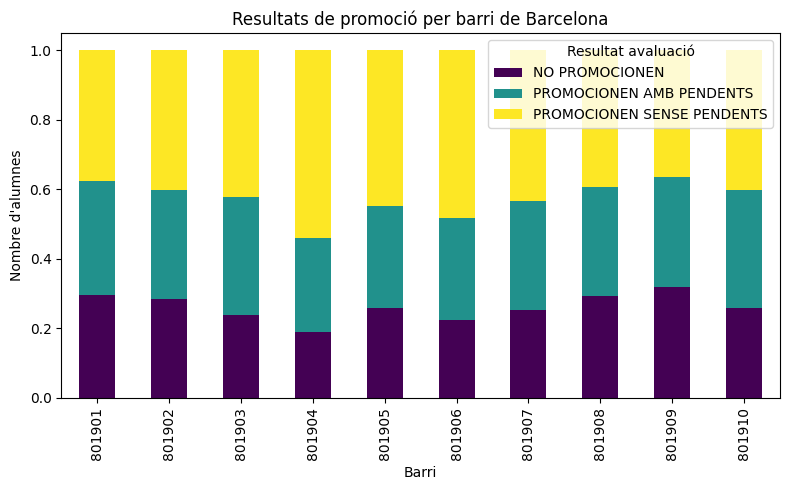

'\ndf_norm_privat.plot(kind=\'barh\', figsize=(14, 6))\nplt.title("Resultats de promoció per barri de Barcelona")\nplt.xlabel("Barri")\nplt.ylabel("Nombre d\'alumnes")\nplt.xticks(rotation=90)\nplt.legend(title="Resultat avaluació")\nplt.tight_layout()\nplt.show()\n'

In [186]:

df_counts = df_coles_bcn.groupby(["Codi districte", "Resultat de l'avaluació"]).size().unstack(fill_value=0)
df_counts
df_norm = df_counts.div(df_counts.sum(axis=1), axis=0)
df_counts.head()

df_norm.plot(kind='bar', stacked=True, figsize=(8,5), cmap='viridis')
plt.title("Resultats de promoció per barri de Barcelona")
plt.xlabel("Barri")
plt.ylabel("Nombre d'alumnes")
plt.xticks(rotation=90)
plt.legend(title="Resultat avaluació")
plt.tight_layout()
plt.show()
"""
df_norm_privat.plot(kind='barh', figsize=(14, 6))
plt.title("Resultats de promoció per barri de Barcelona")
plt.xlabel("Barri")
plt.ylabel("Nombre d'alumnes")
plt.xticks(rotation=90)
plt.legend(title="Resultat avaluació")
plt.tight_layout()
plt.show()
"""

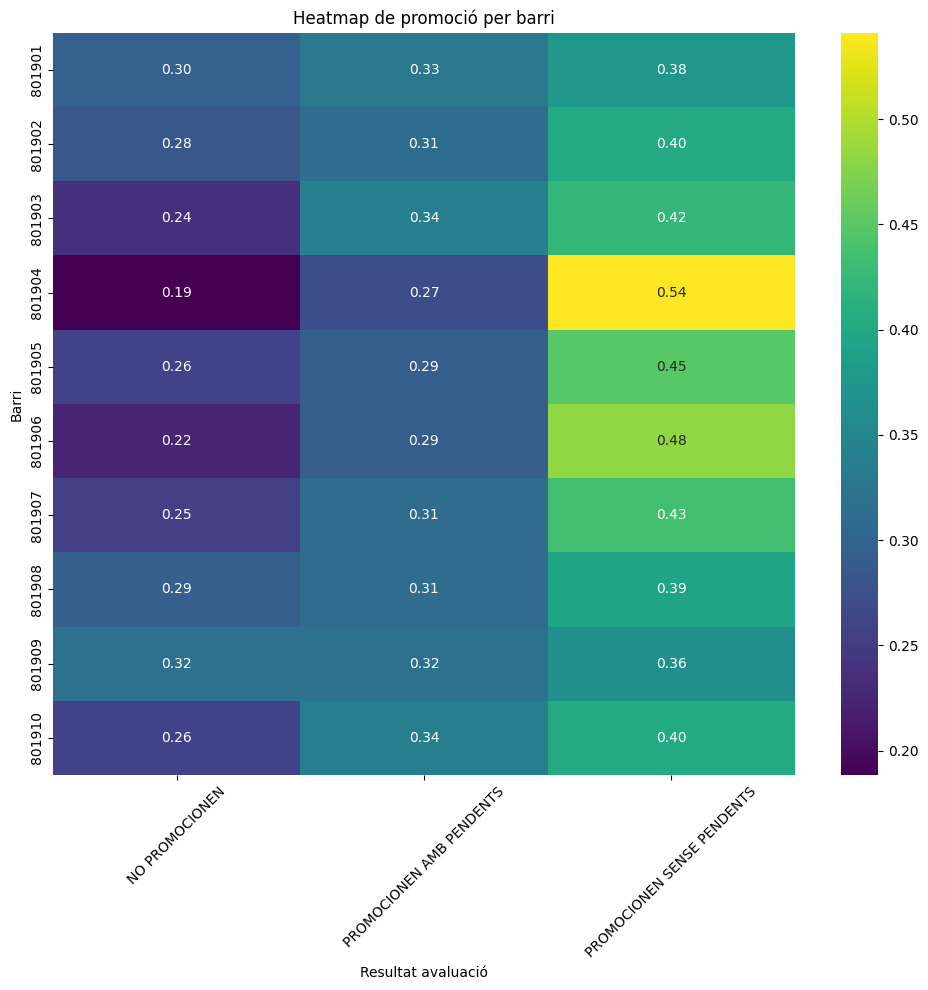

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(df_norm, cmap='viridis', annot=True, fmt=".2f")

plt.title("Heatmap de promoció per barri")
plt.xlabel("Resultat avaluació")
plt.xticks(rotation=45)
plt.ylabel("Barri")
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

Filtered data for Barcelona, Level 4: 281 rows.

Total students by school type (Level 4 only):
PRIVAT: 8,517 students
PÚBLIC: 5,582 students

Percentage by school type (Level 4 only):
PRIVAT: 60.41%
PÚBLIC: 39.59%

Percentage by school type:


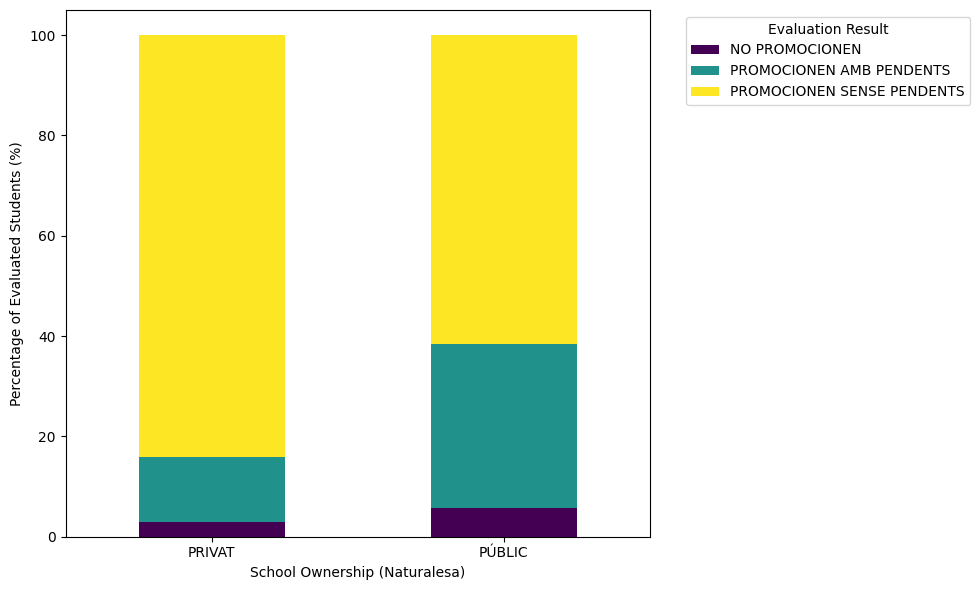

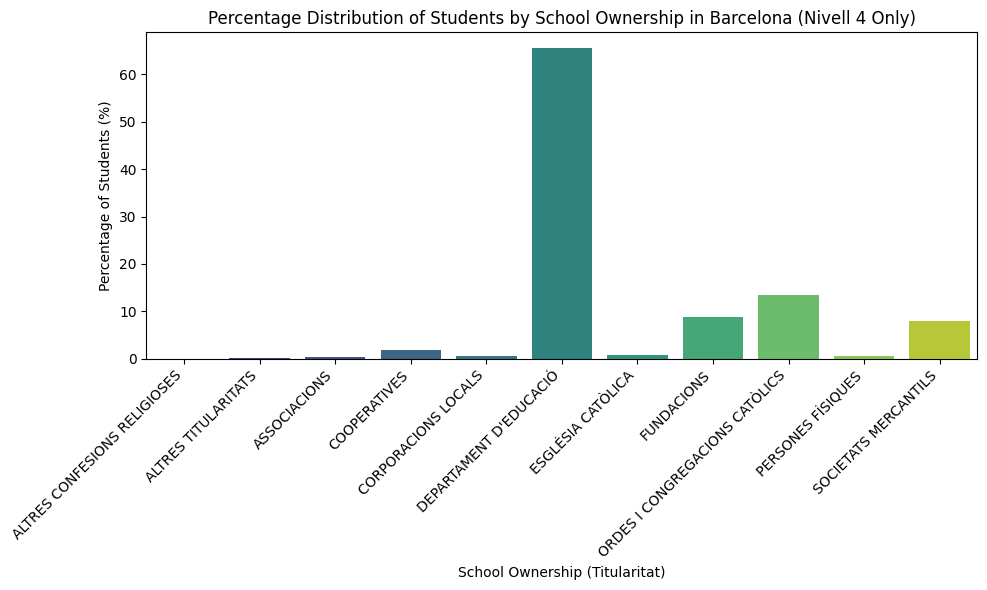

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Filtered data for Barcelona, Level 4: {barcelona_level4_df.shape[0]} rows.")

students_by_type = barcelona_level4_df.groupby('Naturalesa')['Alumnes avaluats'].sum()
print("\nTotal students by school type (Level 4 only):")

for school_type, total in students_by_type.items():
    print(f"{school_type}: {total:,} students")
total_students = students_by_type.sum()
print("\nPercentage by school type (Level 4 only):")
for school_type, total in students_by_type.items():
    percentage = (total / total_students) * 100
    print(f"{school_type}: {percentage:.2f}%")
total_students = students_by_type.sum()
print("\nPercentage by school type:")

plot1_data = (
    barcelona_df.groupby(['Naturalesa', "Resultat de l'avaluació"])
    ['Alumnes avaluats']
    .sum()
    .unstack(fill_value=0)
)

plot1_data_pct = plot1_data.div(plot1_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))
plot1_data_pct.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
plt.xlabel("School Ownership (Naturalesa)")
plt.ylabel("Percentage of Evaluated Students (%)")
plt.xticks(rotation=0)
plt.legend(title="Evaluation Result", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plot2_total = df.groupby(['Titularitat'])['Alumnes avaluats'].sum().reset_index()

total_students = plot2_total['Alumnes avaluats'].sum()
plot2_total['Percentage'] = plot2_total['Alumnes avaluats'] / total_students * 100

plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot2_total,
    x='Titularitat',
    y='Percentage', 
    palette='viridis',
    hue= 'Titularitat',
    legend=False
)

plt.title("Percentage Distribution of Students by School Ownership in Barcelona (Nivell 4 Only)")
plt.xlabel("School Ownership (Titularitat)")
plt.ylabel("Percentage of Students (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [1]:
ownership_analysis = barcelona_df.groupby(['Naturalesa', 'Titularitat'])['Alumnes avaluats'].sum().reset_index()
total_by_naturalesa = ownership_analysis.groupby('Naturalesa')['Alumnes avaluats'].transform('sum')
ownership_analysis['Percentage'] = (ownership_analysis['Alumnes avaluats'] / total_by_naturalesa) * 100

plt.figure(figsize=(12, 8))

naturalesa_categories = ownership_analysis['Naturalesa'].unique()
titularitat_categories = {}
for nat in naturalesa_categories:
    titularitat_categories[nat] = ownership_analysis[ownership_analysis['Naturalesa'] == nat]['Titularitat'].unique()

for i, naturalesa in enumerate(naturalesa_categories):
    group_data = ownership_analysis[ownership_analysis['Naturalesa'] == naturalesa]
    n_bars = len(group_data)
    bar_width = 0.8 / max(len(titularitat_categories[nat]) for nat in naturalesa_categories)  
    for j, (_, row) in enumerate(group_data.iterrows()):
        if n_bars < len(titularitat_categories[naturalesa_categories[0]]): 
            offset = bar_width * (j - (n_bars-1)/2)
            x_pos = i + offset
        else:
            x_pos = i - 0.4 + bar_width/2 + j*bar_width
        plt.bar(
            x_pos, 
            row['Percentage'], 
            width=bar_width,
            color=plt.cm.viridis(j/len(titularitat_categories[naturalesa])),
            label=row['Titularitat'] if i == 0 and j < len(titularitat_categories[naturalesa]) else ""
        )
        
        plt.text(
            x_pos,
            row['Percentage'] + 1,
            f'{row["Percentage"]:.1f}%',
            ha='center',
            fontsize=9
        )

plt.xticks(range(len(naturalesa_categories)), naturalesa_categories)
plt.title('Distribution of Students by School Type and Ownership', fontsize=14)
plt.xlabel('School Type (Public/Private)', fontsize=12)
plt.ylabel('Percentage of Students (%)', fontsize=12)

all_titularitats = []
for nat in naturalesa_categories:
    all_titularitats.extend(titularitat_categories[nat])
unique_titularitats = sorted(set(all_titularitats))

handles = [plt.Rectangle((0,0),1,1, color=plt.cm.viridis(i/len(unique_titularitats))) 
           for i in range(len(unique_titularitats))]
plt.legend(handles, unique_titularitats, 
           title='Ownership Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("\nDetailed breakdown of students by school type and ownership:")
pivot_table = ownership_analysis.pivot_table(index='Titularitat',  columns='Naturalesa',  values=['Alumnes avaluats', 'Percentage'])
print(pivot_table)

NameError: name 'barcelona_df' is not defined

In [189]:
import geopandas as gpd
geobarris_df =  gpd.read_file('/Users/34633/avdata/truco-o-dato/data/BarcelonaCiutat_Barris.csv')
df_norm_map = df_norm.reset_index()
gdf_map = geobarris_df.merge(df_norm_map, left_on='nom_districte', right_on='District_Name')
fig, ax = plt.subplots(figsize=(10,10))
gdf_map.plot(column='PROMOCIONEN AMB PENDENT',cmap='Reds',linewidth=0.5,edgecolor='black',legend=True,legend_kwds={'label': "Proporció que proporciona amb pendents"}, ax=ax)

plt.title("Percentatge d’alumnes que promocionen amb pendents per barri de Barcelona")
plt.axis('off')
plt.show()

KeyError: 'District_Name'

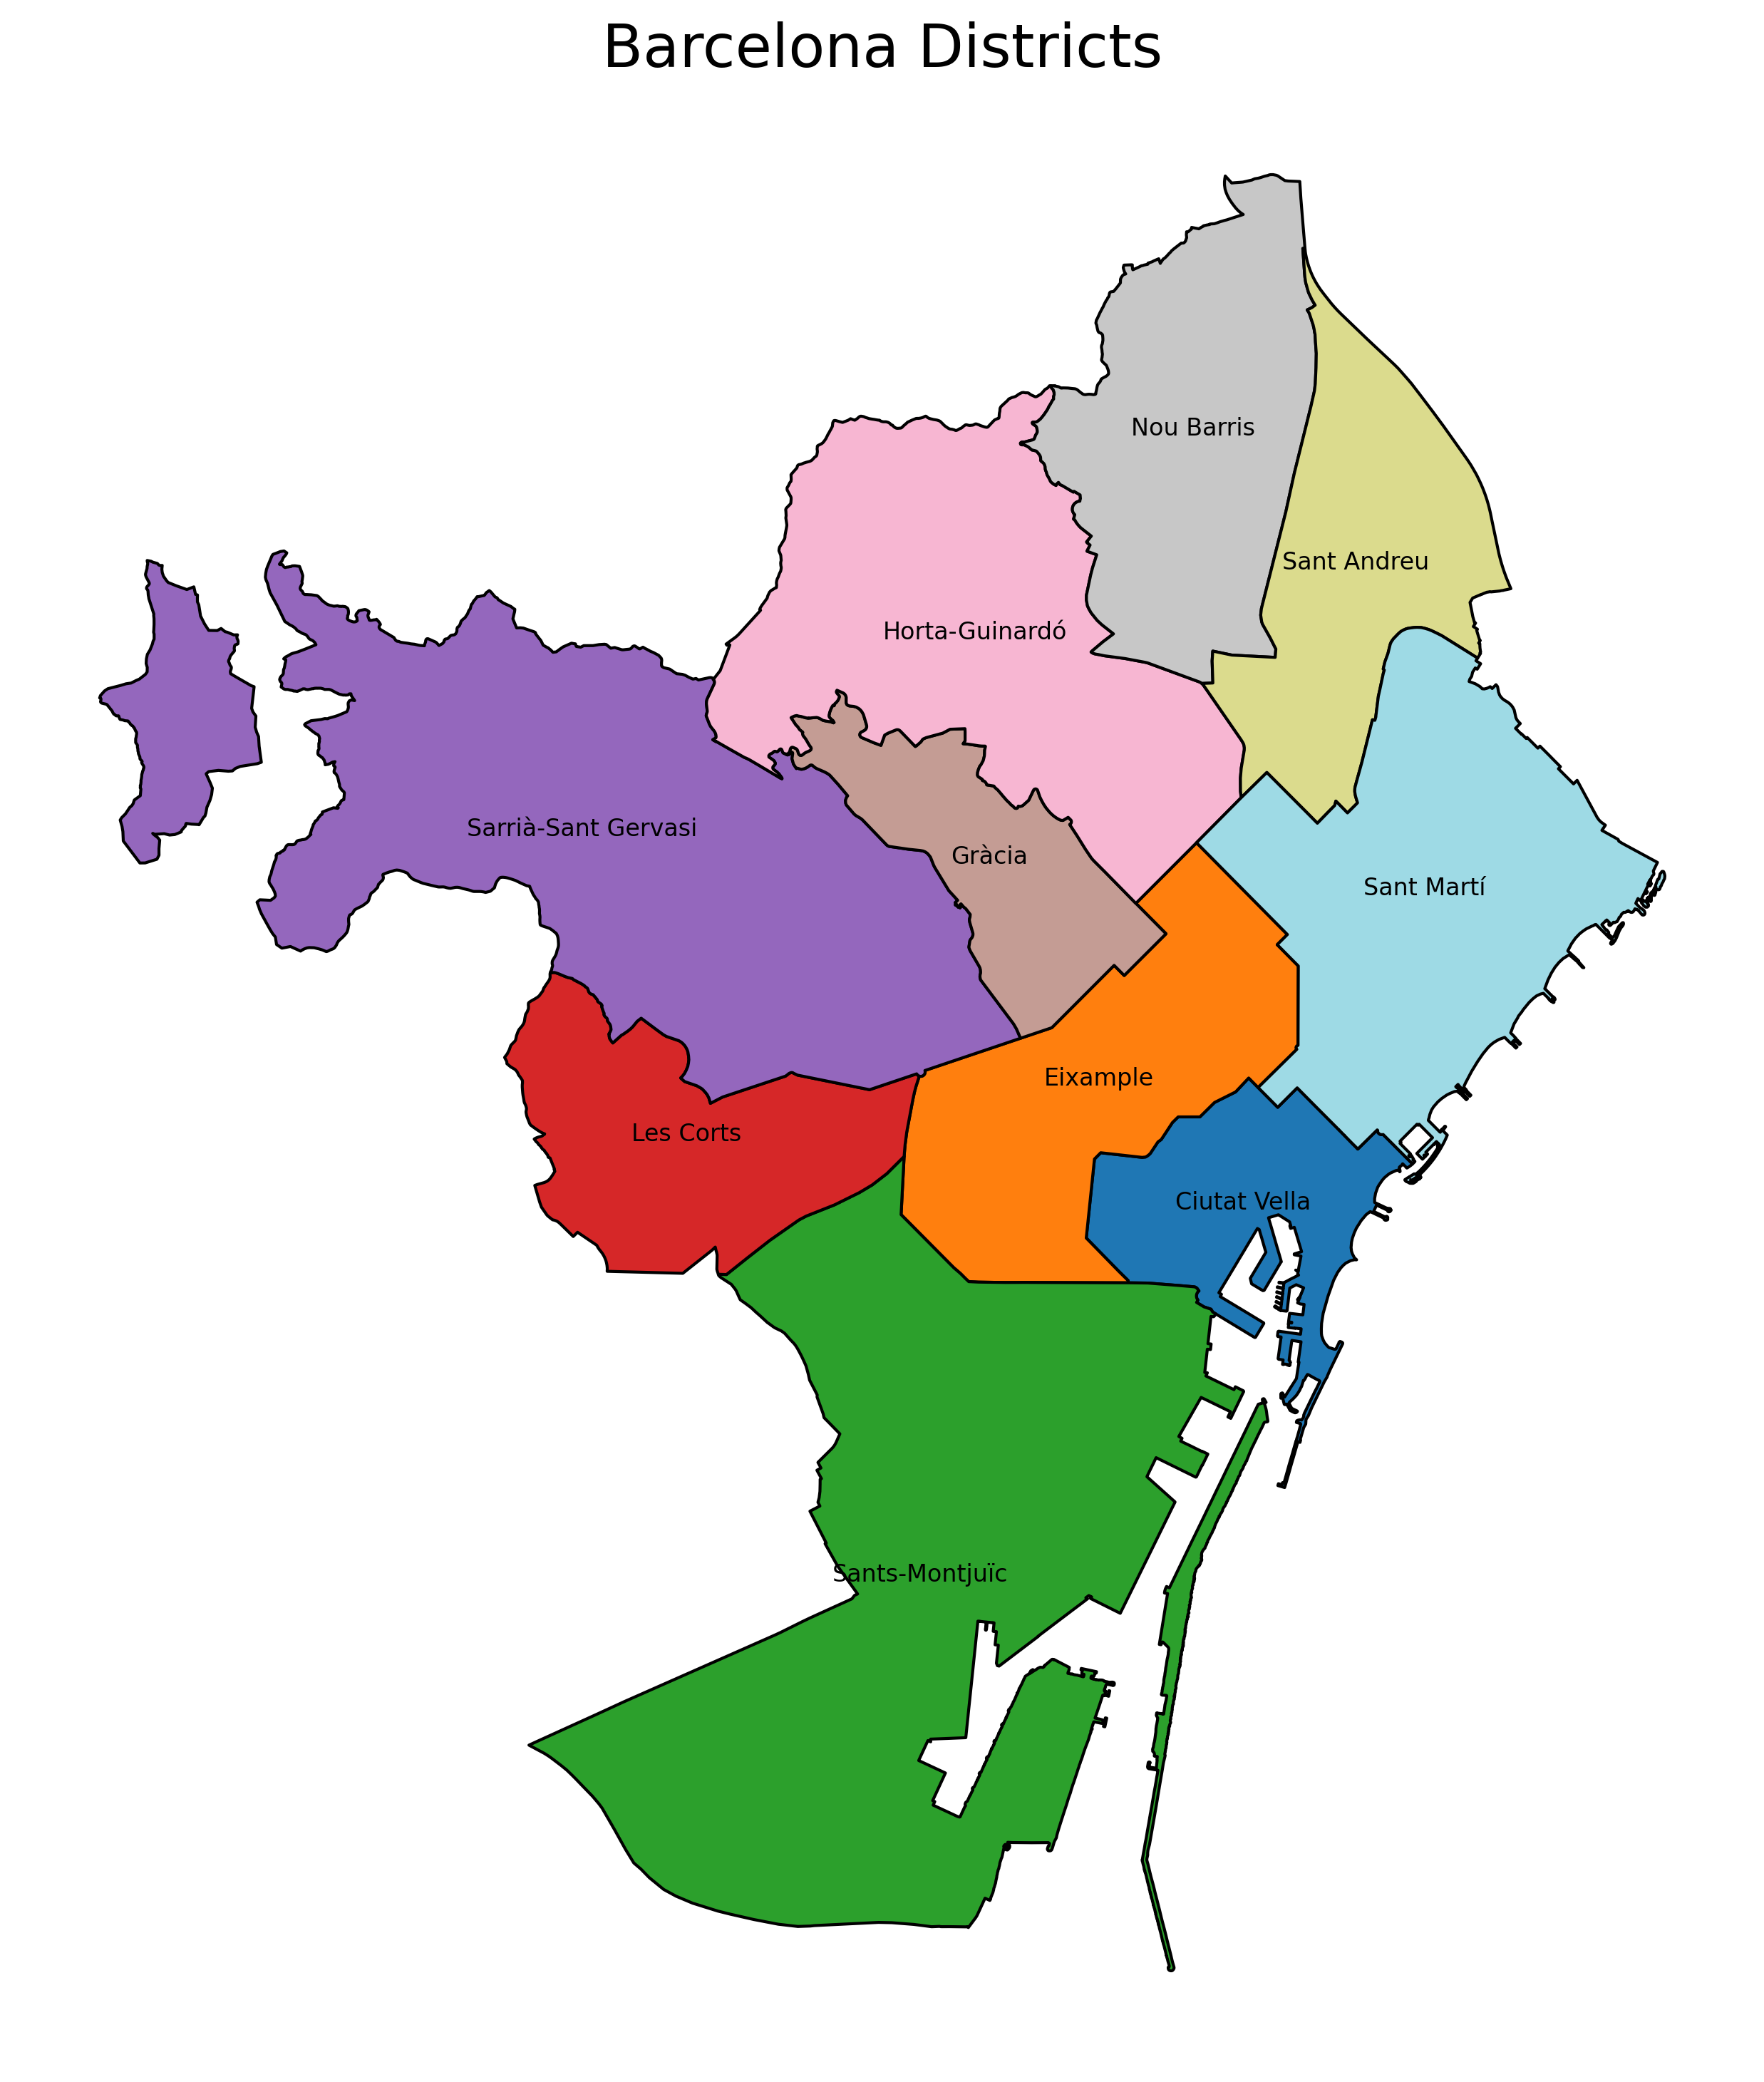

In [66]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

df = pd.read_json("/Users/34633/avdata/truco-o-dato/data/BarcelonaCiutat_Districtes.json")

df['geometry'] = df['geometria_etrs89'].apply(wkt.loads)

districts = gpd.GeoDataFrame(df, geometry='geometry')
districts.set_crs(epsg=25831, inplace=True) #assings a coordinate reference system. 25831 is the one commonly used for bcn
districts = districts.to_crs(epsg=4326)
"""
set_crs() Label your coordinates with the correct system
to_crs() Convert your coordinates into a new system
"""

fig, ax = plt.subplots(figsize=(12,12), dpi=300)
districts.plot(ax=ax, edgecolor='black', cmap='tab20')
for idx, row in districts.iterrows():
    plt.annotate(
        text=row['nom_districte'],  # replace with your column
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center',
        fontsize=8,
        color='black'
    )
plt.title("Barcelona Districts", fontsize=20)
plt.axis('off')
plt.show()

In [41]:
print(districts['nom_districte'].tolist())

['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris', 'Sant Andreu', 'Sant Martí']


In [42]:
print(df_counts_reset['Districte'].tolist())


['CIUTAT VELLA', 'EIXAMPLE', 'GRÀCIA', 'HORTA - GUINARDÓ', 'LES CORTS', 'NOU BARRIS', 'SANT ANDREU', 'SANT MARTÍ', 'SANTS - MONTJUÏC', 'SARRIÀ - SANT GERVASI']


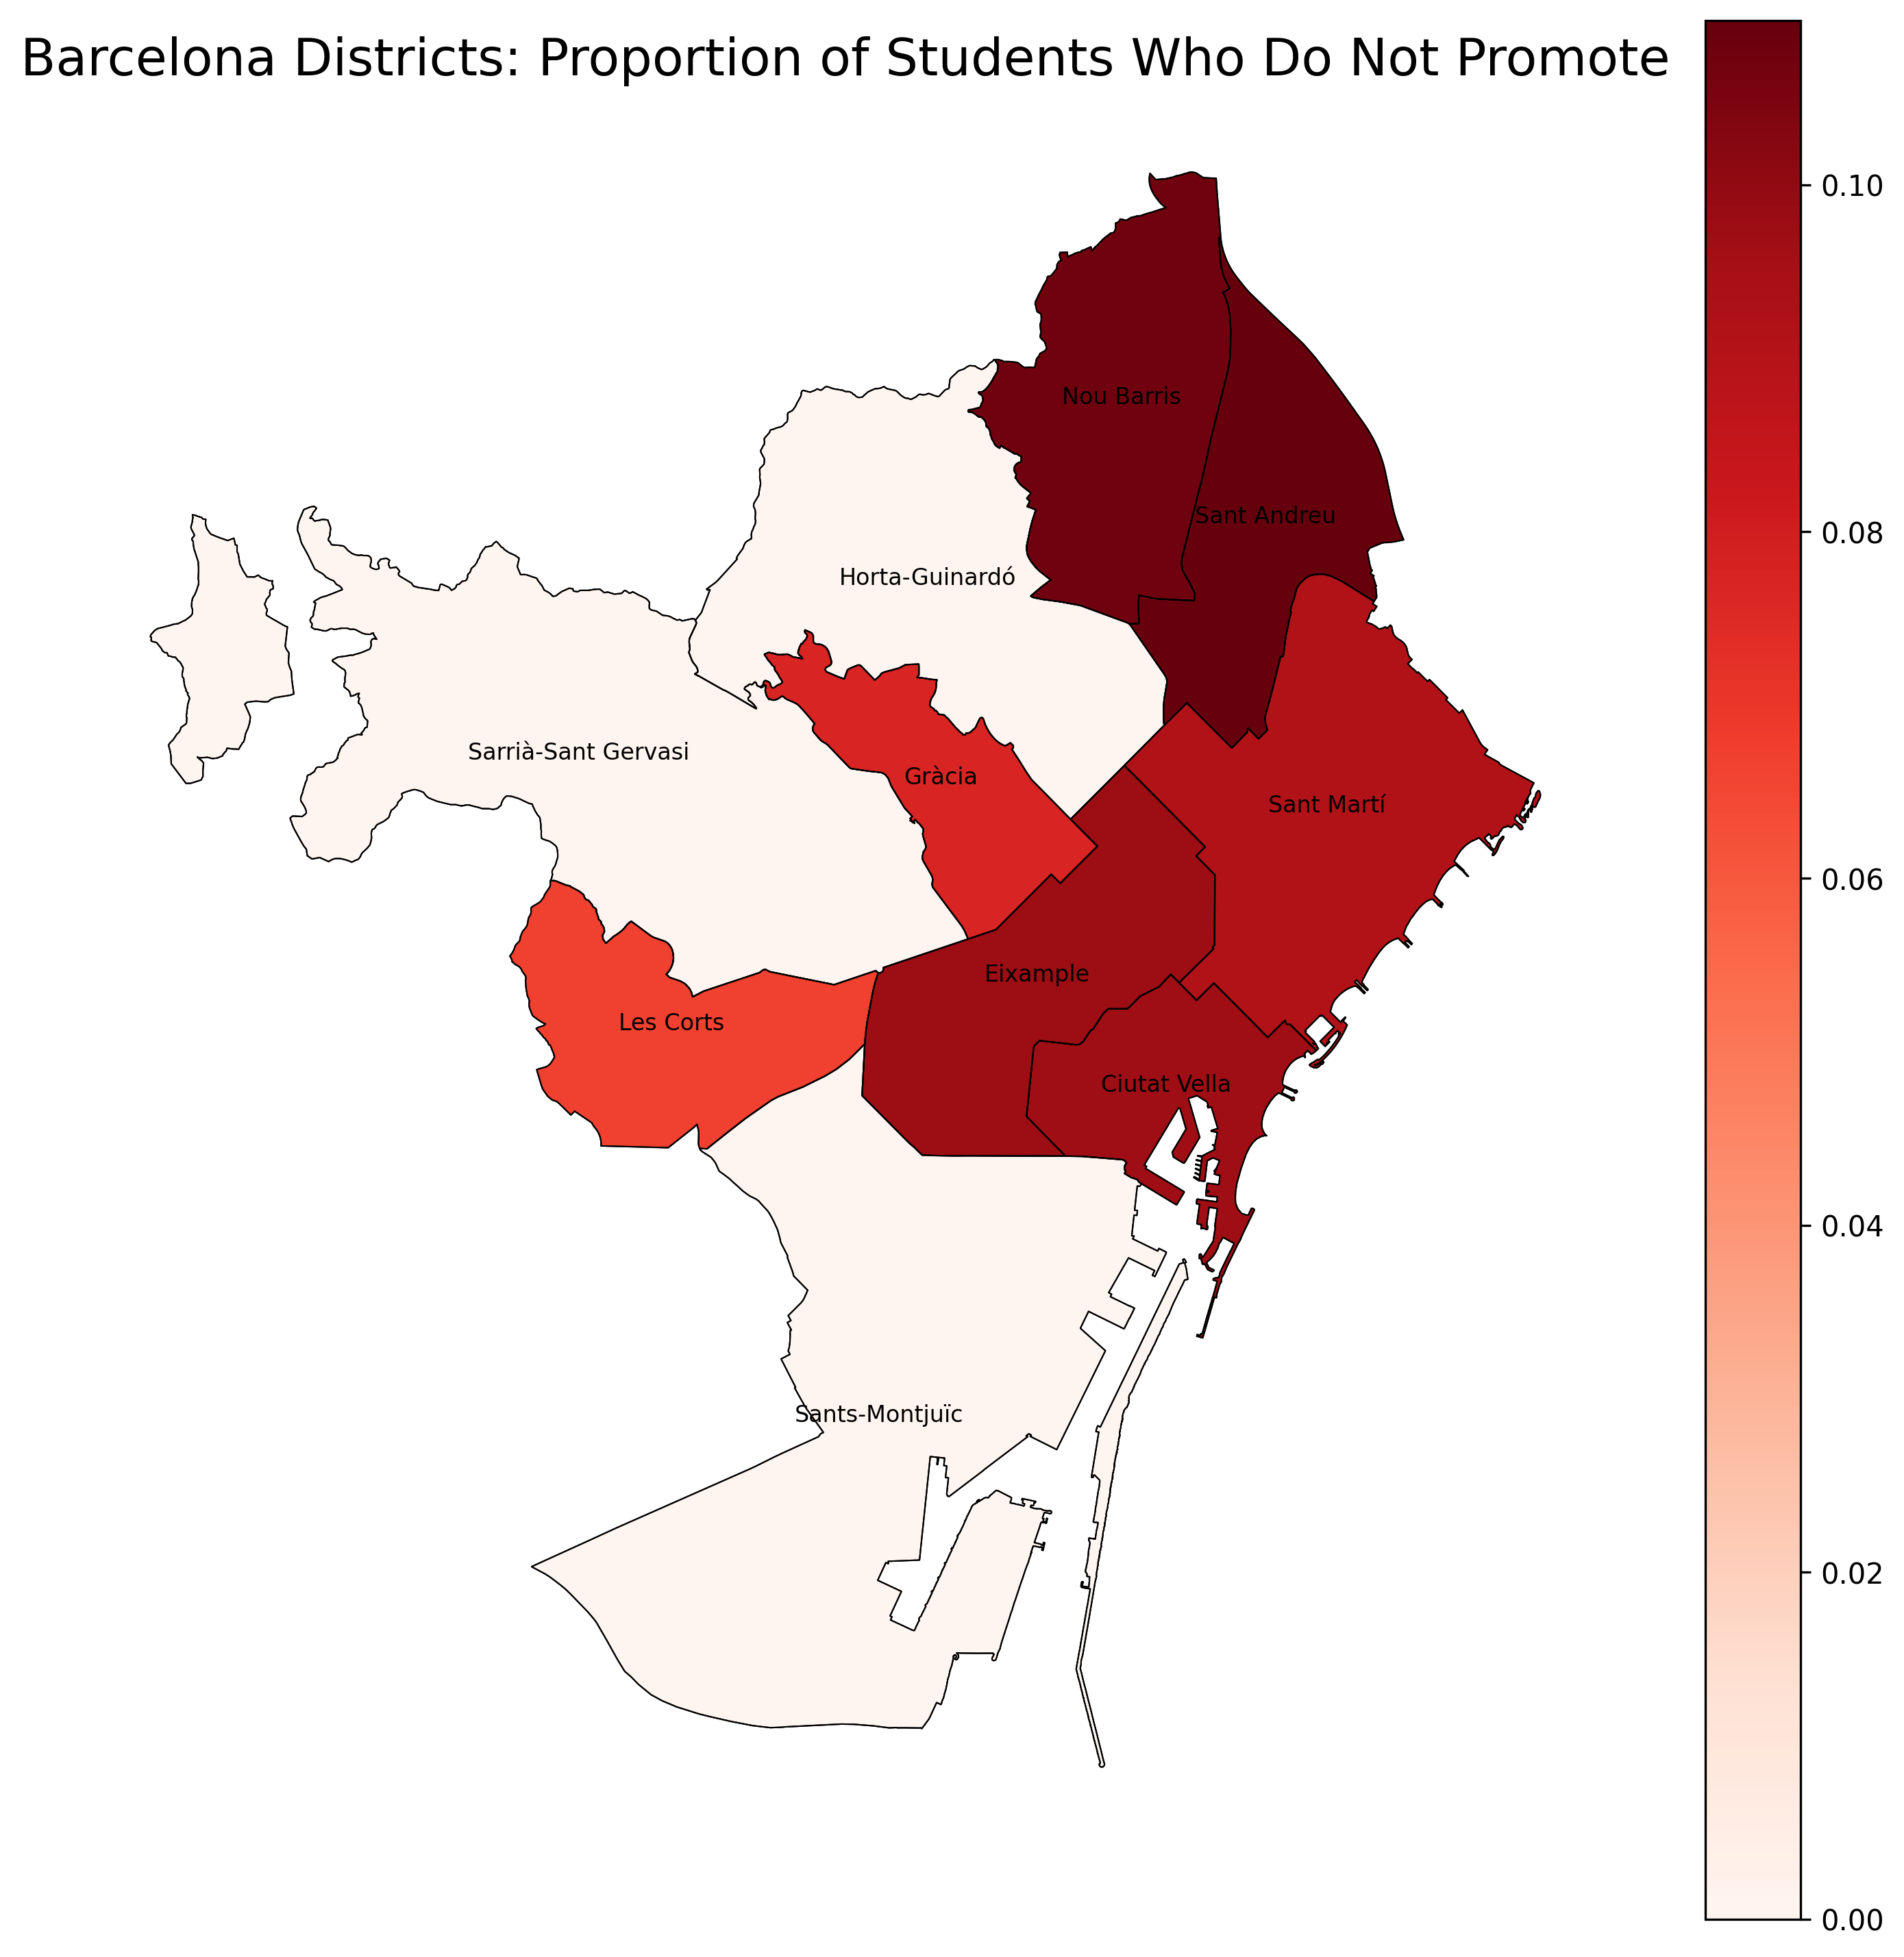

<Figure size 640x480 with 0 Axes>

In [61]:
districts['nom_districte'] = districts['nom_districte'].str.strip().str.upper()
df_counts_reset['Districte'] = df_counts_reset['Districte'].str.strip().str.upper()
df_counts_reset['NO PROMOCIONEN'] = df_counts_reset.get('NO PROMOCIONEN', 0)
df_counts_reset['PROP_NO_PROMOCIONEN'] = df_counts_reset['NO PROMOCIONEN'] / df_counts_reset[['NO PROMOCIONEN'] + 
                                                                                           [col for col in df_counts_reset.columns if col not in ['Districte', 'NO_PROMOCIONEN']]].sum(axis=1)
districts_merged = districts.merge(
    df_counts_reset[['Districte', 'PROP_NO_PROMOCIONEN']], 
    left_on='nom_districte', 
    right_on='Districte', 
    how='left'
)
districts_merged['PROP_NO_PROMOCIONEN'] = districts_merged['PROP_NO_PROMOCIONEN'].fillna(0)

fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
districts_merged.boundary.plot(color='black', linewidth=0.5, ax=ax)
districts_merged.plot(column='PROP_NO_PROMOCIONEN',cmap='Reds',legend=True,edgecolor='black',linewidth=0.5,ax=ax)
for idx, row in districts_merged.iterrows():
    plt.annotate(text=row['nom_districte'].title(), xy=(row.geometry.centroid.x, row.geometry.centroid.y), horizontalalignment='center', fontsize=8, color='black')

plt.title("Barcelona Districts: Proportion of Students Who Do Not Promote", fontsize=18)
plt.axis('off')
plt.show()
plt.savefig('mapanopromocionen.png')

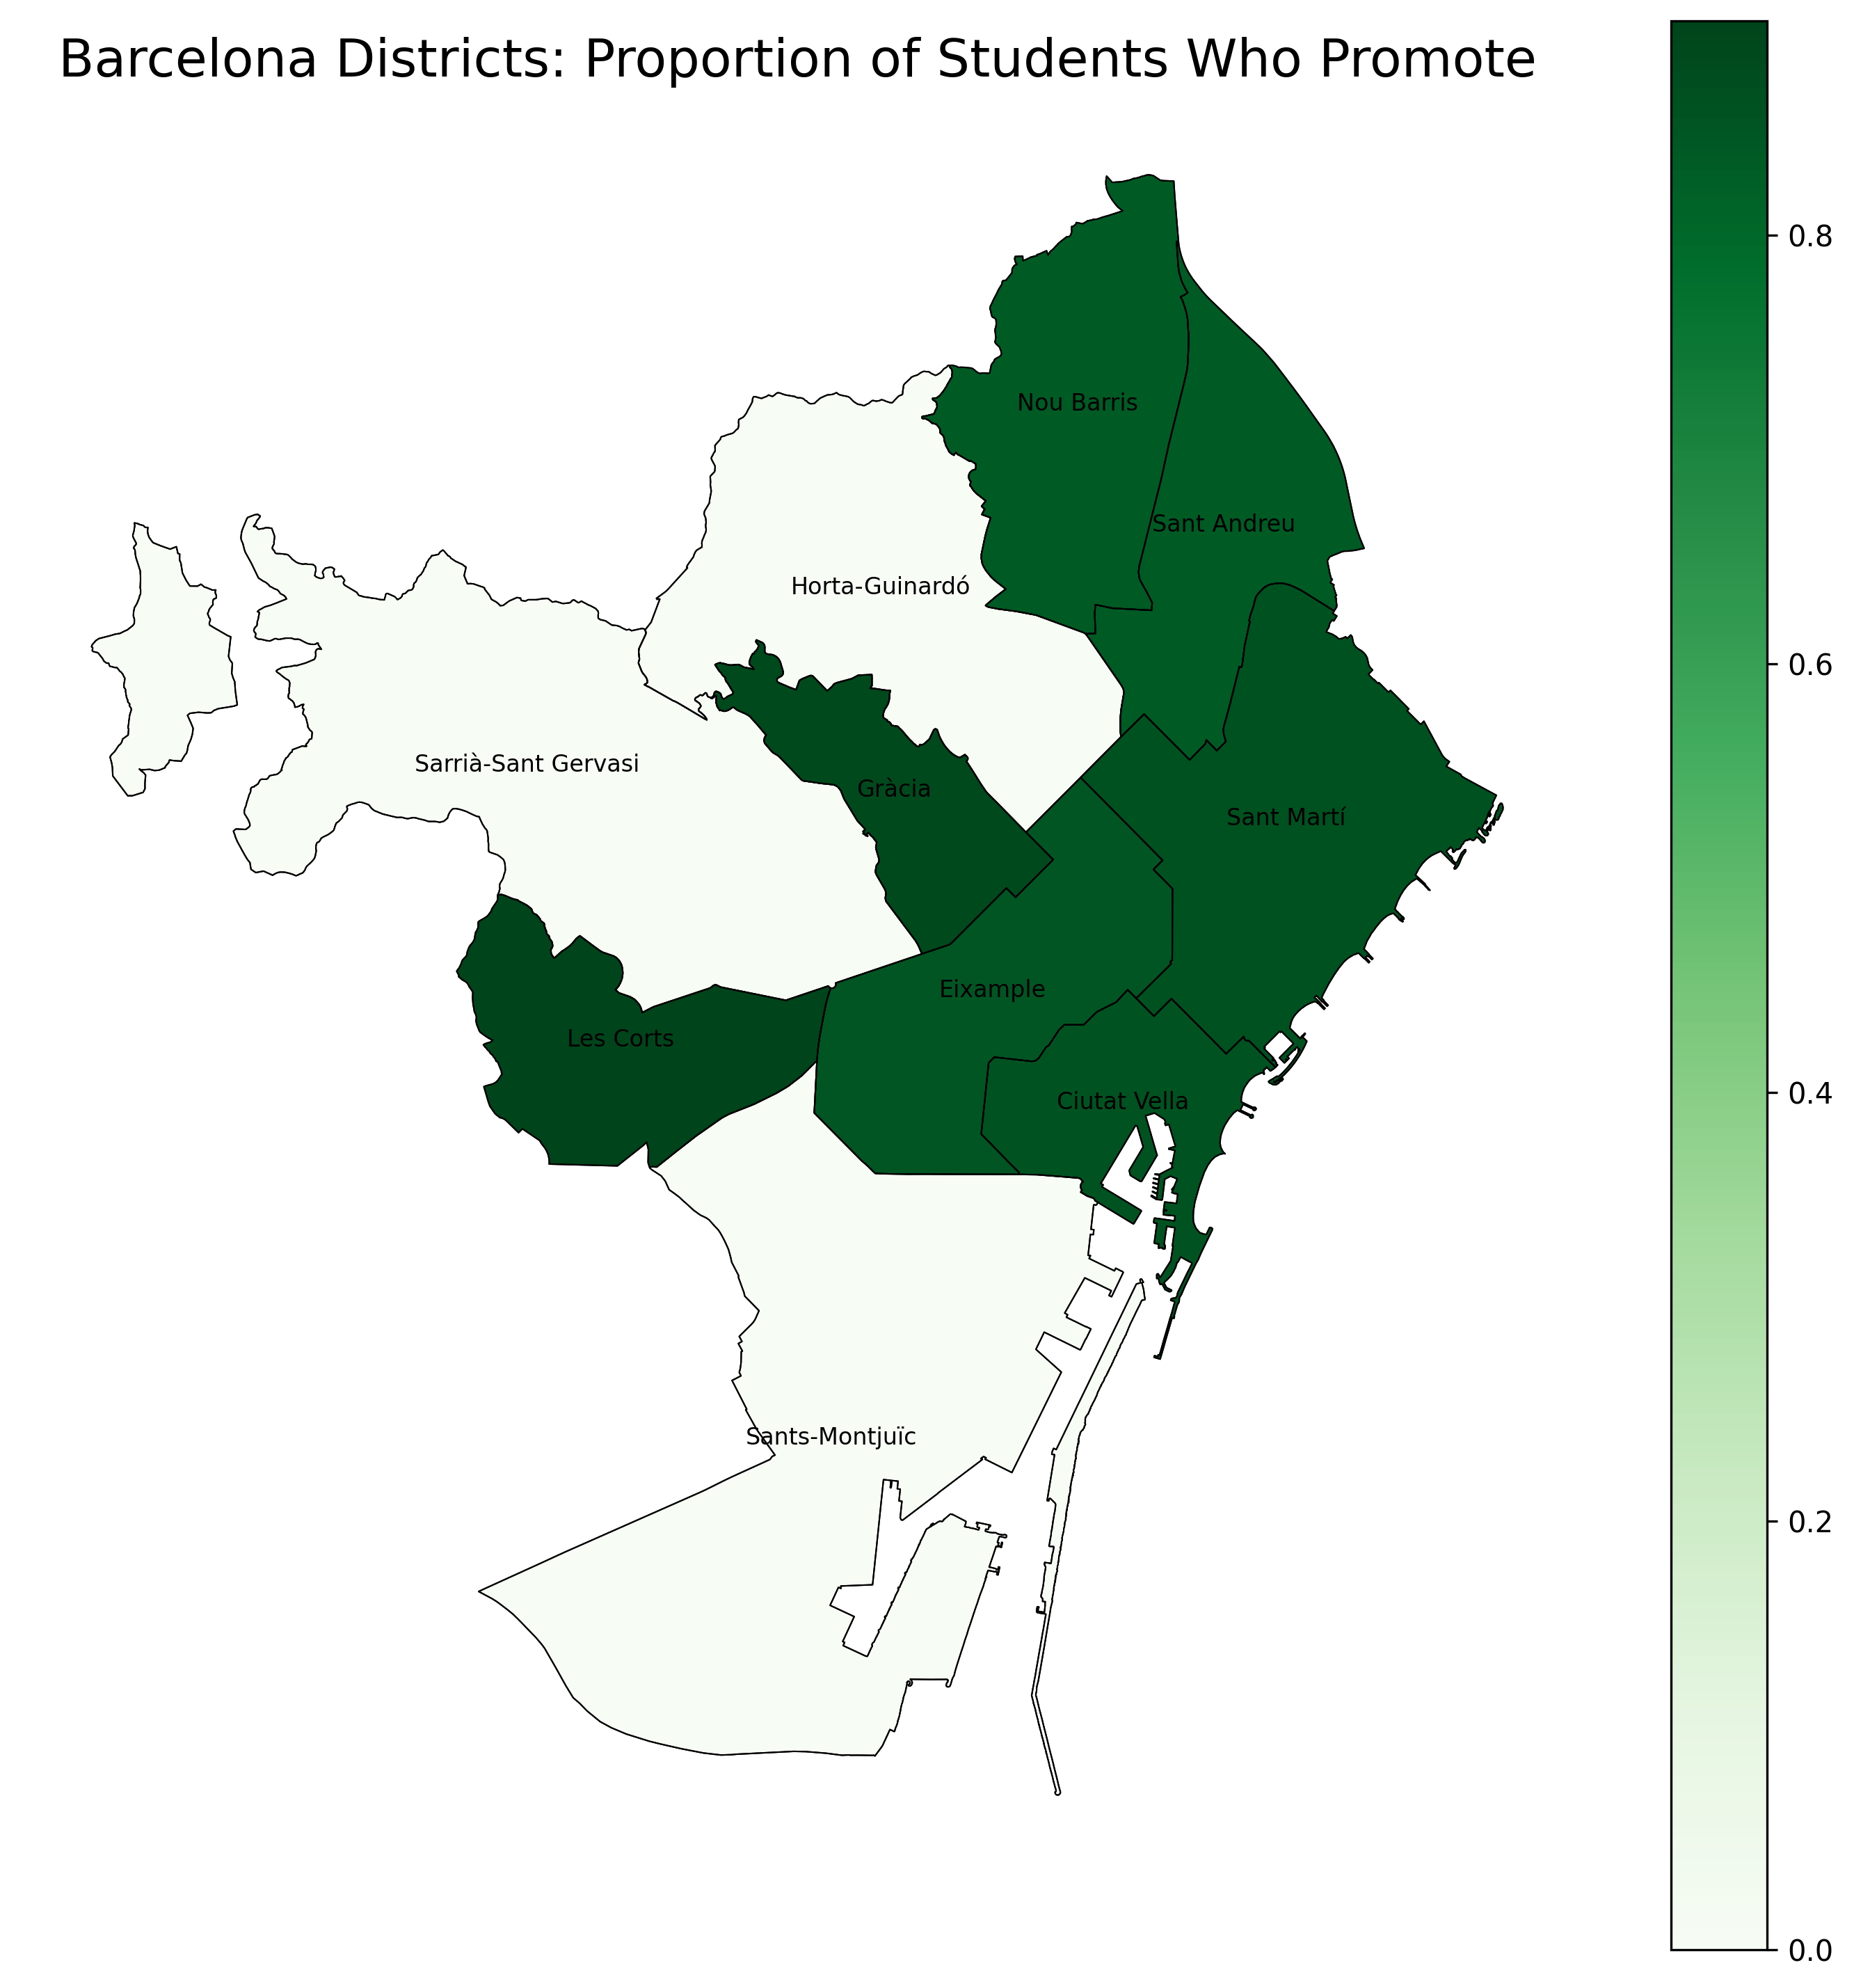

In [52]:
"""
districts['nom_districte'] = districts['nom_districte'].str.strip().str.upper()
df_counts_reset['Districte'] = df_counts_reset['Districte'].str.strip().str.upper()
df_counts_reset['PROMOCIONEN AMB PENDENTS'] = df_counts_reset.get('PROMOCIONEN AMB PENDENTS', 0)
df_counts_reset['PROMOCIONEN SENSE PENDENTS'] = df_counts_reset.get('PROMOCIONEN SENSE PENDENTS', 0)
df_counts_reset['TOTAL_PROMOCIONEN'] = df_counts_reset['PROMOCIONEN AMB PENDENTS'] + df_counts_reset['PROMOCIONEN SENSE PENDENTS']
df_counts_reset['PROP_TOTAL_PROMOCIONEN'] = df_counts_reset['TOTAL_PROMOCIONEN'] / df_counts_reset[
    [col for col in df_counts_reset.columns if col not in ['Districte', 'TOTAL_PROMOCIONEN']]
].sum(axis=1)

districts['nom_districte'] = districts['nom_districte'].str.strip().str.upper()
df_counts_reset['Districte'] = df_counts_reset['Districte'].str.strip().str.upper()
df_counts_reset['PROP_PROMOCIONEN_AMB_PENDENTS'] = df_counts_reset.get('PROMOCIONEN AMB PENDENTS', 0)
df_counts_reset['PROP_PROMOCIONEN_AMB_PENDENTS'] = df_counts_reset['PROP_PROMOCIONEN_AMB_PENDENTS'] / df_counts_reset[
    df_counts_reset.columns.difference(['Districte'])
].sum(axis=1)
df_counts_reset['PROP_PROMOCIONEN_SENSE_PENDENTS'] = df_counts_reset.get('PROMOCIONEN SENSE PENDENTS', 0)
df_counts_reset['PROP_PROMOCIONEN_SENSE_PENDENTS'] = df_counts_reset['PROP_PROMOCIONEN_SENSE_PENDENTS'] / df_counts_reset[
    df_counts_reset.columns.difference(['Districte'])
].sum(axis=1)

df_counts_reset['PROP_PROMOCIONEN_TOTAL'] = df_counts_reset['PROP_PROMOCIONEN_AMB_PENDENTS'] + df_counts_reset['PROP_PROMOCIONEN_SENSE_PENDENTS']
"""
df_counts_reset['PROP_NO_PROMOCIONEN'] = df_counts_reset['NO PROMOCIONEN'] / df_counts_reset[['NO PROMOCIONEN'] + 
                                                                                           [col for col in df_counts_reset.columns if col not in ['Districte', 'NO_PROMOCIONEN']]].sum(axis=1)
df_counts_reset['PROP_PROMOCIONEN_TOTAL'] = 1 - df_counts_reset['PROP_NO_PROMOCIONEN']
districts_merged = districts.merge(
    df_counts_reset[['Districte', 'PROP_PROMOCIONEN_TOTAL']], 
    left_on='nom_districte', 
    right_on='Districte', 
    how='left'
)
districts_merged['PROP_PROMOCIONEN_TOTAL'] = districts_merged['PROP_PROMOCIONEN_TOTAL'].fillna(0)

fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
districts_merged.boundary.plot(color='black', linewidth=0.5, ax=ax)
districts_merged.plot(column='PROP_PROMOCIONEN_TOTAL',cmap='Greens',legend=True,edgecolor='black',linewidth=0.5,ax=ax)
for idx, row in districts_merged.iterrows():
    plt.annotate(text=row['nom_districte'].title(), xy=(row.geometry.centroid.x, row.geometry.centroid.y), horizontalalignment='center', fontsize=8, color='black')

plt.title("Barcelona Districts: Proportion of Students Who Promote", fontsize=18)
plt.axis('off')
plt.show()

In [116]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter for Barcelona
df_coles_bcn = df_coles[df_coles['Municipi'] == 'BARCELONA']

# -----------------------------
# 2️⃣ Aggregate by district and result
# -----------------------------
df_counts = df_coles_bcn.groupby(['Districte', 'Resultat']).size().unstack(fill_value=0)

# Ensure all relevant columns exist
for col in ['PROMOCIONEN AMB PENDENTS', 'PROMOCIONEN SENSE PENDENTS', 'NO PROMOCIONEN']:
    if col not in df_counts.columns:
        df_counts[col] = 0

# -----------------------------
# 3️⃣ Compute proportions correctly
# -----------------------------
# Total promotion per district
df_counts['TOTAL_PROMOCIONEN'] = df_counts['PROMOCIONEN AMB PENDENTS'] + df_counts['PROMOCIONEN SENSE PENDENTS']

# Total students per district
df_counts['TOTAL_ALUMNES'] = df_counts['TOTAL_PROMOCIONEN'] + df_counts['NO PROMOCIONEN']

# Proportion who promote
df_counts['PROP_PROMOCIONEN_TOTAL'] = df_counts['TOTAL_PROMOCIONEN'] / df_counts['TOTAL_ALUMNES']

# Proportion who do not promote
df_counts['PROP_NO_PROMOCIONEN'] = 1 - df_counts['PROP_PROMOCIONEN_TOTAL']

# Reset index for merging
df_counts_reset = df_counts.reset_index()

# -----------------------------
# 4️⃣ Merge with districts GeoDataFrame
# -----------------------------
districts['nom_districte'] = districts['nom_districte'].str.strip().str.upper()
df_counts_reset['Districte'] = df_counts_reset['Districte'].str.strip().str.upper()

districts_merged = districts.merge(
    df_counts_reset[['Districte', 'PROP_PROMOCIONEN_TOTAL', 'PROP_NO_PROMOCIONEN']],
    left_on='nom_districte',
    right_on='Districte',
    how='left'
)
districts_merged['PROP_PROMOCIONEN_TOTAL'] = districts_merged['PROP_PROMOCIONEN_TOTAL'].fillna(0)
districts_merged['PROP_NO_PROMOCIONEN'] = districts_merged['PROP_NO_PROMOCIONEN'].fillna(0)

# -----------------------------
# 5️⃣ Plot side-by-side maps
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(20, 12), dpi=300)

# Map 1: Students who promote
districts_merged.boundary.plot(color='black', linewidth=0.5, ax=axes[0])
districts_merged.plot(
    column='PROP_PROMOCIONEN_TOTAL',
    cmap='Greens',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    ax=axes[0]
)
axes[0].set_title("Proportion of Students Who Promote", fontsize=16)
axes[0].axis('off')

# Map 2: Students who do not promote
districts_merged.boundary.plot(color='black', linewidth=0.5, ax=axes[1])
districts_merged.plot(
    column='PROP_NO_PROMOCIONEN',
    cmap='Reds',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    ax=axes[1]
)
axes[1].set_title("Proportion of Students Who Do Not Promote", fontsize=16)
axes[1].axis('off')
"""
# Add district labels on both maps
for idx, row in districts_merged.iterrows():
    for ax in axes:
        plt.annotate(
            text=row['nom_districte'].title(),
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            horizontalalignment='center',
            fontsize=8,
            color='black',
            ax=ax
        )

plt.tight_layout()
plt.show()
"""

KeyError: 'Districte'

In [130]:
df_barris = gpd.read_file('/Users/34633/avdata/truco-o-dato/data/barcelona_barris_clean.geojson')
df_barris.head()
df_barris.columns = df_barris.columns.str.strip()

In [ ]:

print(df_coles_bcn.columns.tolist())
df_coles_bcn.columns = df_coles_bcn.columns.str.strip()
df_coles_bcn['Codi districte']

df_coles_bcn["Codi districte"] = df_coles_bcn["Codi districte"].astype(str).str.zfill(6).str[:2].astype(int)

df_merged = df_coles_bcn.merge(
    df_barris, 
    left_on="Codi districte",  # Match the actual column name!
    right_on="codi_districte",  # Check what this column is actually called in df_barris
    how='left'
)
df_merged

Columns in df_coles_bcn:
['Curs', 'Estudi', 'Codi àrea territorial', 'Àrea territorial', 'Codi comarca', 'Comarca', 'Codi municipi', 'Municipi', 'Codi districte', 'Naturalesa', 'Titularitat', 'Nivell', 'Sexe', 'Concert', "Resultat de l'avaluació", 'Alumnes avaluats', 'District_Code']

Columns in df_barris:
['codi_districte', 'nom_districte', 'codi_barri', 'nom_barri', 'geometria_etrs89', 'geometria_wgs84', 'geometry']

Sample values from df_coles_bcn['Codi districte']:
0    0
1    0
2    0
3    0
4    0
Name: Codi districte, dtype: int64

Sample values from df_barris['codi_districte']:
0    1
1    1
2    1
3    1
4    2
Name: codi_districte, dtype: int32

Merge successful! Shape: (1187, 24)


C:\Users\34633\AppData\Local\Temp\ipykernel_18740\221259579.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coles_bcn["Codi districte"] = df_coles_bcn["Codi districte"].astype(str).str.zfill(6).str[:2].astype(int)


,Curs,Estudi,Codi àrea territorial,Àrea territorial,Codi comarca,Comarca,Codi municipi,Municipi,Codi districte,Naturalesa,...,Resultat de l'avaluació,Alumnes avaluats,District_Code,codi_districte,nom_districte,codi_barri,nom_barri,geometria_etrs89,geometria_wgs84,geometry
0,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,0,PRIVAT,...,PROMOCIONEN SENSE PENDENTS,17,80,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,0,PRIVAT,...,PROMOCIONEN AMB PENDENTS,5,80,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,0,PRIVAT,...,PROMOCIONEN SENSE PENDENTS,38,80,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,0,PRIVAT,...,NO PROMOCIONEN,1,80,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2021/2022,EDUCACIÓ SECUNDÀRIA OBLIGATÒRIA,108,CONSORCI D'EDUCACIÓ DE BARCELONA,13,BARCELONÈS,8019,BARCELONA,0,PRIVAT,...,PROMOCIONEN AMB PENDENTS,6,80,NaN,NaN,NaN,NaN,NaN,NaN,None
